# Download data from public repositories

Analyzing the spatial patterns of microbial traits also poses a significant challenge due to the limited availability of environmental data that correspond to microbiome data, and this dearth of paired datasets is particularly prevalent in the majority of currently accessible public repositories. The [geodata](https://github.com/rspatial/geodata) R package provides some method to download spatial, climate and soil properties from public repositories, and the [MODIS](https://modis.gsfc.nasa.gov/) host many remote-sense images of plant metrics and land cover. To a certain extent, this mitigates the difficult of limited environmental data, though the accuracy of their absolute values is relatively lower compared to those measured ones. 

Yet, it is extremely challenging for most R language beginners to effectively integrate these datasets for microbial biogeography analysis, as the whole process involves manipulating diverse datasets. To solve this problem, we designed a series of functions to download various spatial, climate, vegetation, and soil parameters from public repositories. Although the accuracy of these datasets are lower than that of measured ones, they can still be associated with microbial biogeographical features at a larger spatial scale. **Please note that all data would be resampled to a same spatial resolution based on the first downloaded SpatRaster!**

Here we need three R packages for this section of [microgeo](https://github.com/ChaonanLi/microgeo) R package tutorial. Just run the following codes to import them into R environment.

In [1]:
suppressMessages(require("magrittr")) 
require("ggplot2")  %>% suppressMessages()
require("microgeo") %>% suppressMessages()

If the Chinese characters cannot be displayed correctly, please run the following codes to set locale to `UTF-8`:

In [2]:
prev_locale <- Sys.setlocale("LC_CTYPE", "C.UTF-8") 

We need a standard microgeo dataset for the presentations in the section of tutorial.

In [3]:
data(qtp)
map <- read_aliyun_map(adcode = c(540000, 630000, 510000)) %>% suppressMessages() 
dataset.dts.aliyun <- create_dataset(mat = qtp$asv, ant = qtp$tax, met = qtp$met, map = map,
                                     phy = qtp$tre, env = qtp$env, lon = "longitude", lat = "latitude") 
dataset.dts.aliyun %>% show_dataset()

ℹ [2024-01-14 11:37:13] INFO ==> all samples fall within the map area!

ℹ [2024-01-14 11:37:13] INFO ==> dataset has been created successfully!

ℹ [2024-01-14 11:37:13] INFO ==> use `object %>% show_dataset()` to check the summary of dataset.



── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


Now, let's go through each of these functions and see how to download public environmental properties from public repositories.

## 1. Collect aridity index

The `get_ai()` is implemented to download aridity index from [global aridity index database](https://figshare.com/articles/dataset/Global_Aridity_Index_and_Potential_Evapotranspiration_ET0_Climate_Database_v2/7504448/3). The resolution of original data is 30''. Here is a simple example.

In [4]:
# Download aridity index for research area 
dataset.dts.aliyun %<>% get_ai(out.dir = "test")

✔ [2024-01-14 11:37:18] SAVE ==> results have been saved to: object$spa$rast$his$AI



In [5]:
# Show dataset 
dataset.dts.aliyun %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 1 historically numeric variables; 0 historically classification variables; 0 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


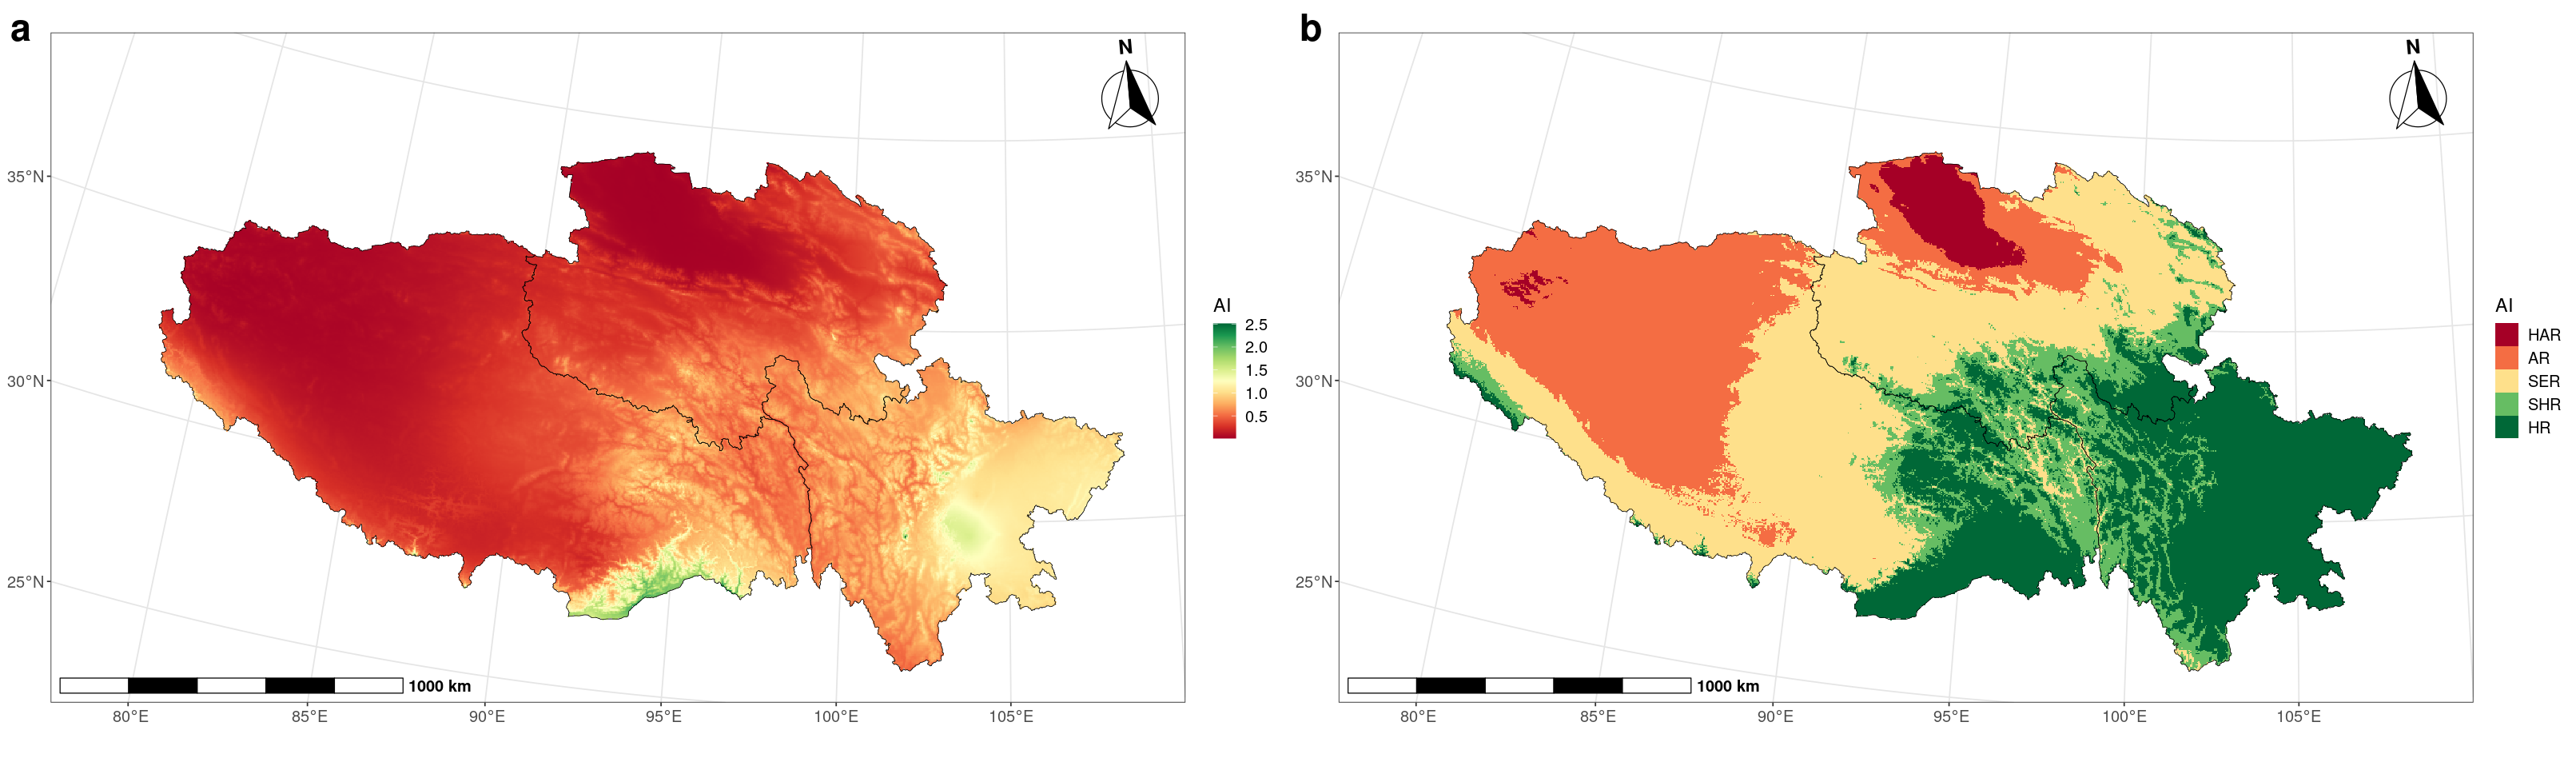

In [6]:
# Visualize the aridity index
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q1 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$AI, 
                   color = colorRampPalette(RColorBrewer::brewer.pal(11, "RdYlGn"))(100)) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q2 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
   add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$AI, breaks = c(0.03, 0.2, 0.5, 0.65),
                  color = RColorBrewer::brewer.pal(11, "RdYlGn")[c(1,3,5,9,11)], labels = c("HAR", "AR", "SER", "SHR", "HR")) %>% 
   add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q1, q2, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 2. Collect elevation

The `get_elev()` is implemented to download elevation data from [WorldClim](https://www.worldclim.org/) database version 2.1. You are allowed to specify a spatial resolution. Here is a simple example based on the resolution of 10'.

In [7]:
# Download elevation for research area 
dataset.dts.aliyun %<>% get_elev(res = 10, out.dir = "test") 

✔ [2024-01-14 11:37:27] SAVE ==> results have been saved to: object$spa$rast$his$ELEV



In [8]:
# Show dataset 
dataset.dts.aliyun %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 2 historically numeric variables; 0 historically classification variables; 0 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


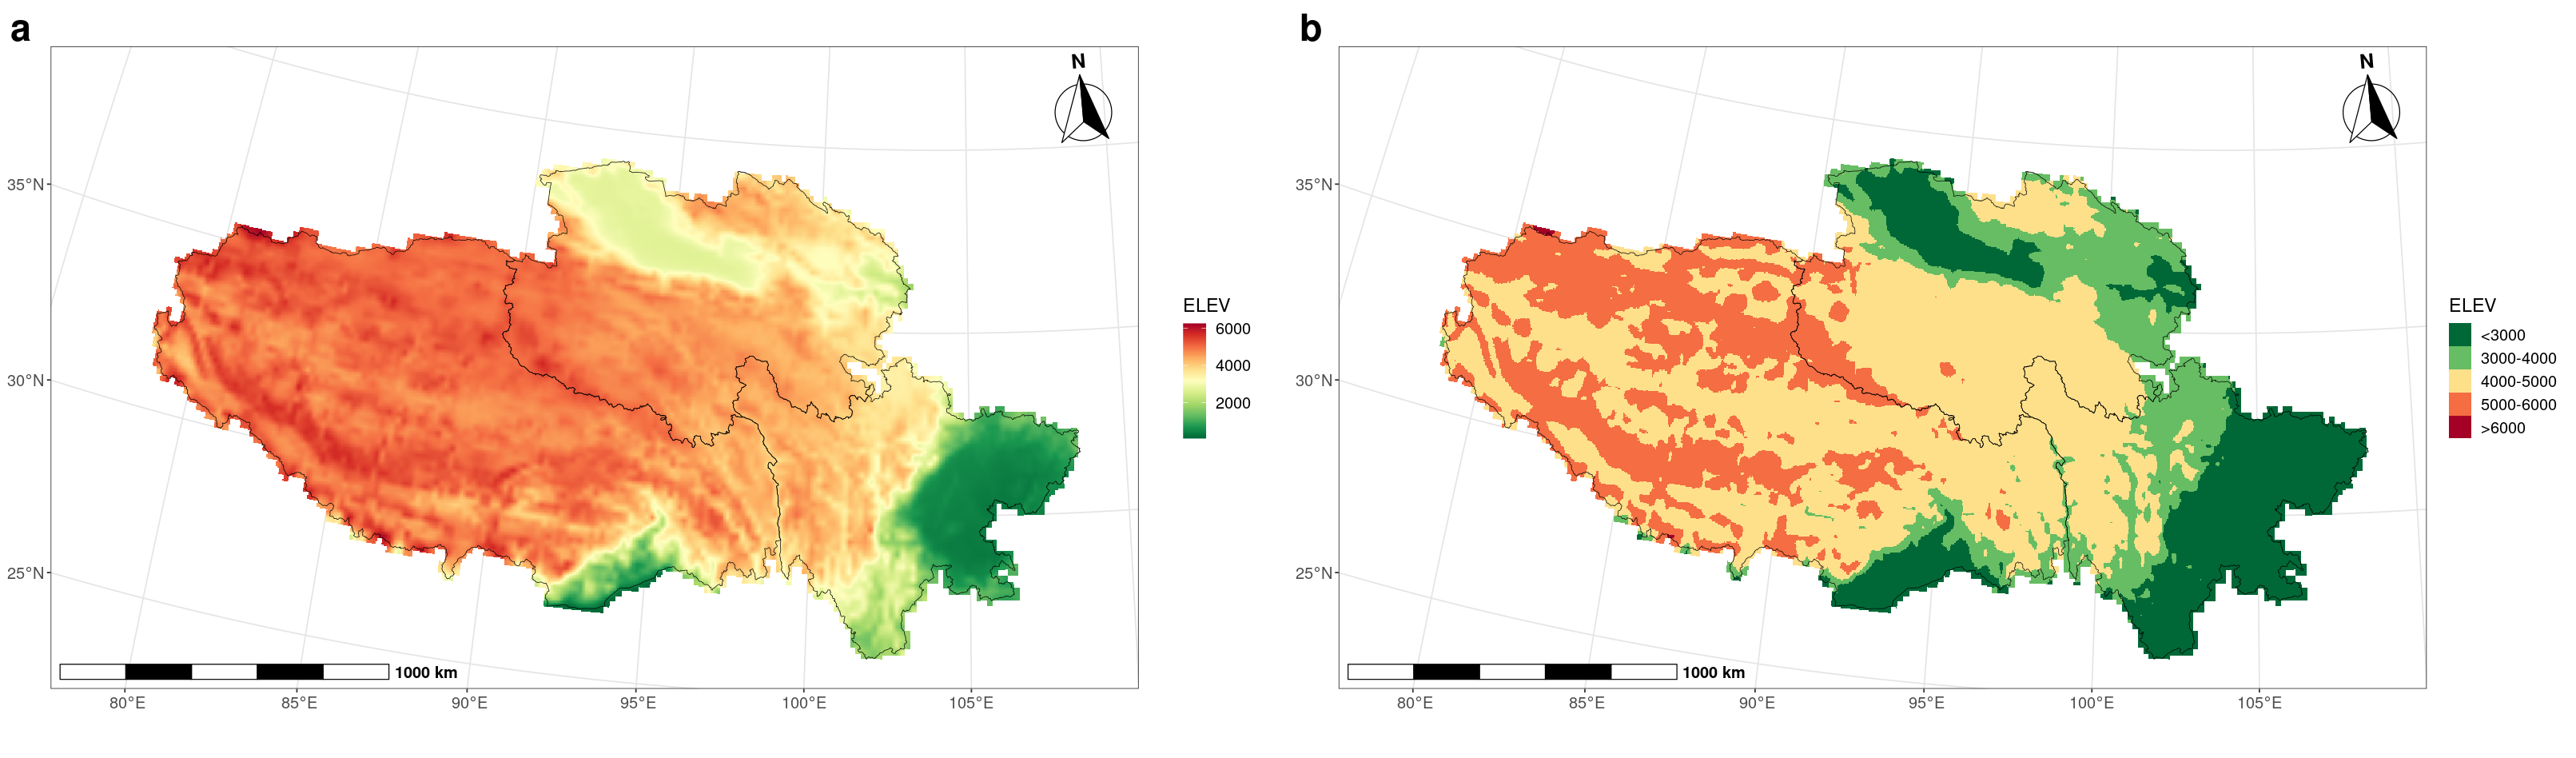

In [9]:
# Visualize the elevation
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q3 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$ELEV) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q4 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
   add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$ELEV, breaks = c(3000, 4000, 5000, 6000), 
                  labels = c("<3000", "3000-4000", "4000-5000", "5000-6000", ">6000")) %>% 
   add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q3, q4, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 3. Collect historical bioclimatic variables

The `get_his_bioc()` is implemented to download 19 historically bioclimatic variables from [WorldClim](https://www.worldclim.org/) database version 2.1. You are allowed to specify a spatial resolution. Here is a simple example based on the resolution of 10'.

In [10]:
# Download 19 historically bioclimatic variables of research area
dataset.dts.aliyun %<>% get_his_bioc(res = 10, out.dir = "test")

✔ [2024-01-14 11:37:42] SAVE ==> results have been saved to: object$spa$rast$his(19 variables)



In [11]:
# Show dataset 
dataset.dts.aliyun %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 21 historically numeric variables; 0 historically classification variables; 0 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


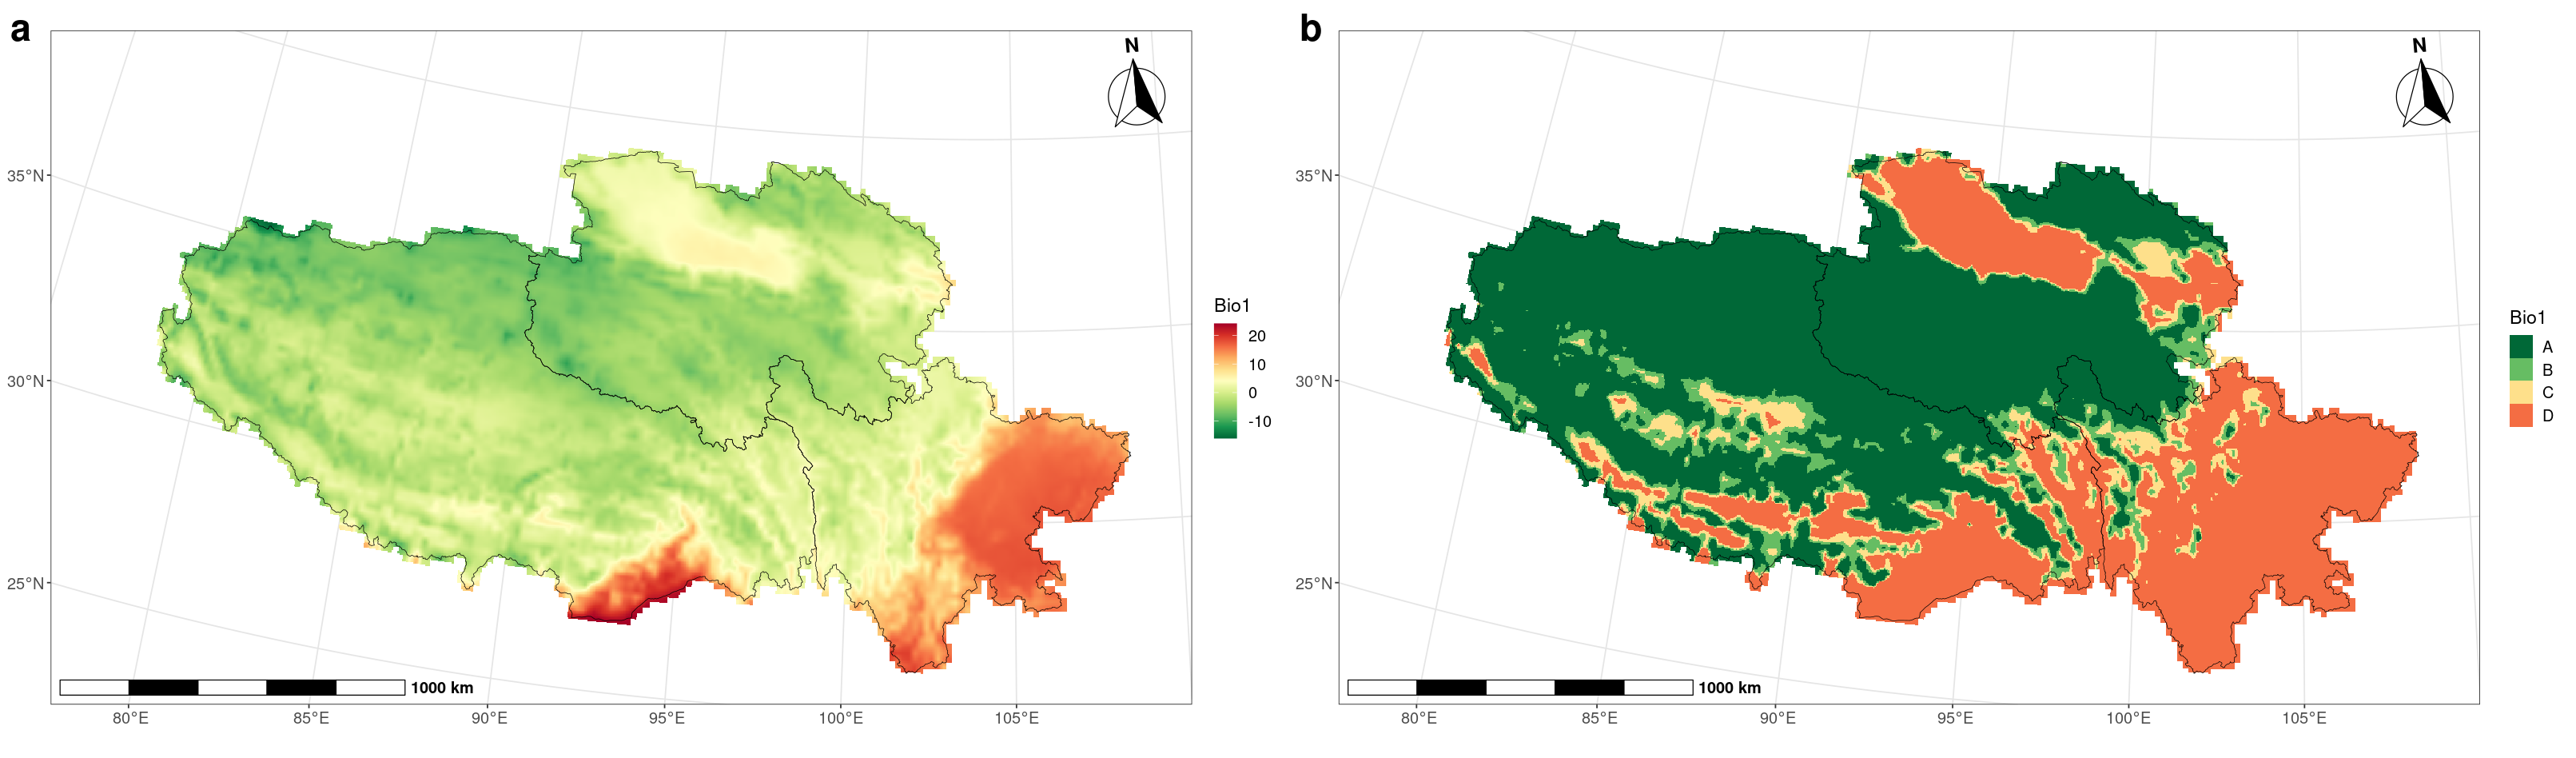

In [12]:
# Visualize the Bio1 (Mean annual temperature) 
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q5 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$Bio1) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q6 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
   add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$Bio1, breaks = c(-1, 0, 1), labels = c("A", "B", "C", "D")) %>% 
   add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q5, q6, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

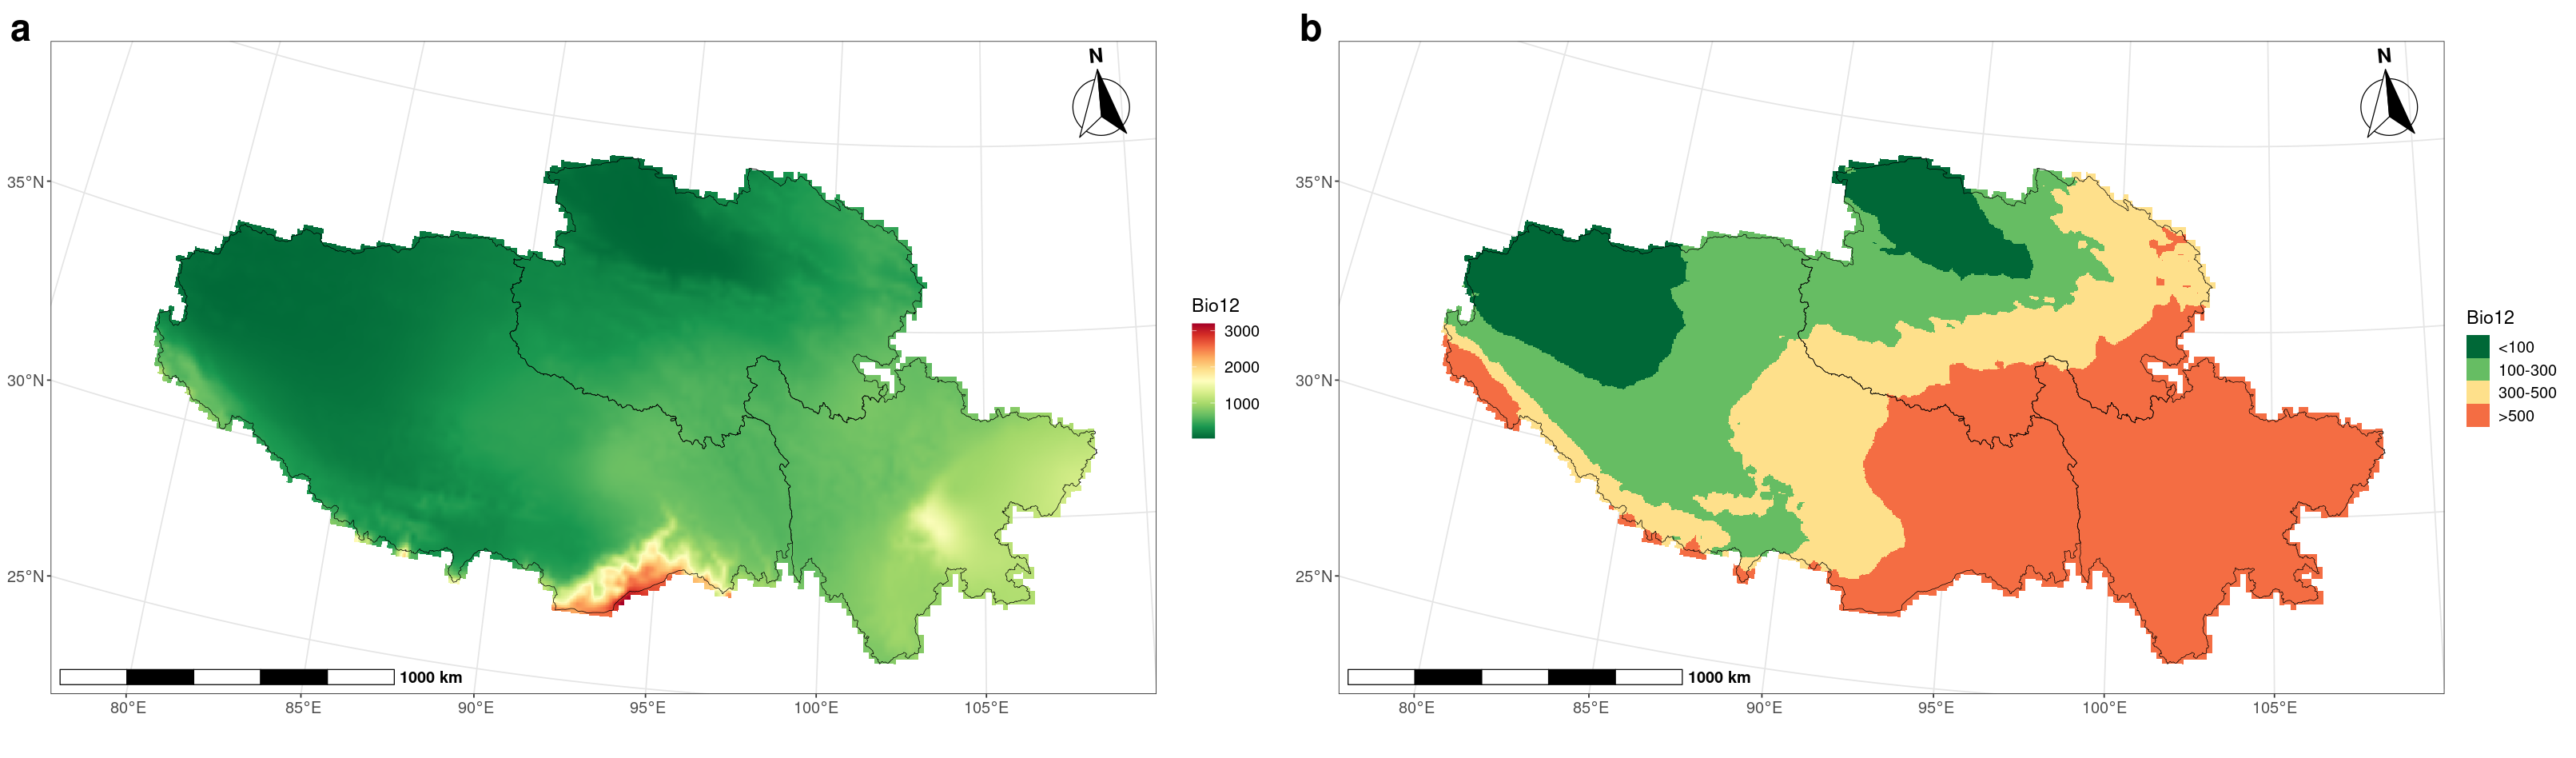

In [13]:
# Visualize the Bio12 (Mean annual precipitation) 
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q7 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$Bio12) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q8 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
   add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$Bio12, breaks = c(100, 300, 500), labels = c("<100", "100-300", "300-500", ">500")) %>% 
   add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q7, q8, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 4. Collect futrue bioclimatic variables

The `get_fut_bioc()` is implemented to download 19 future bioclimatic variables from [WorldClim](https://www.worldclim.org/) database version 2.1. You are allowed to specify a spatial resolution. Here is a simple example based on the resolution of 10'.

In [14]:
# Download futrue bioclimatic variables of research area
dataset.dts.aliyun %<>% get_fut_bioc(res = 10, gcm = "ACCESS-CM2", out.dir = "test")

✔ [2024-01-14 11:38:25] SAVE ==> results have been saved to: object$spa$rast$fut [19 variables; 4 groups]



In [15]:
# Show dataset 
dataset.dts.aliyun %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 21 historically numeric variables; 0 historically classification variables; 4 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


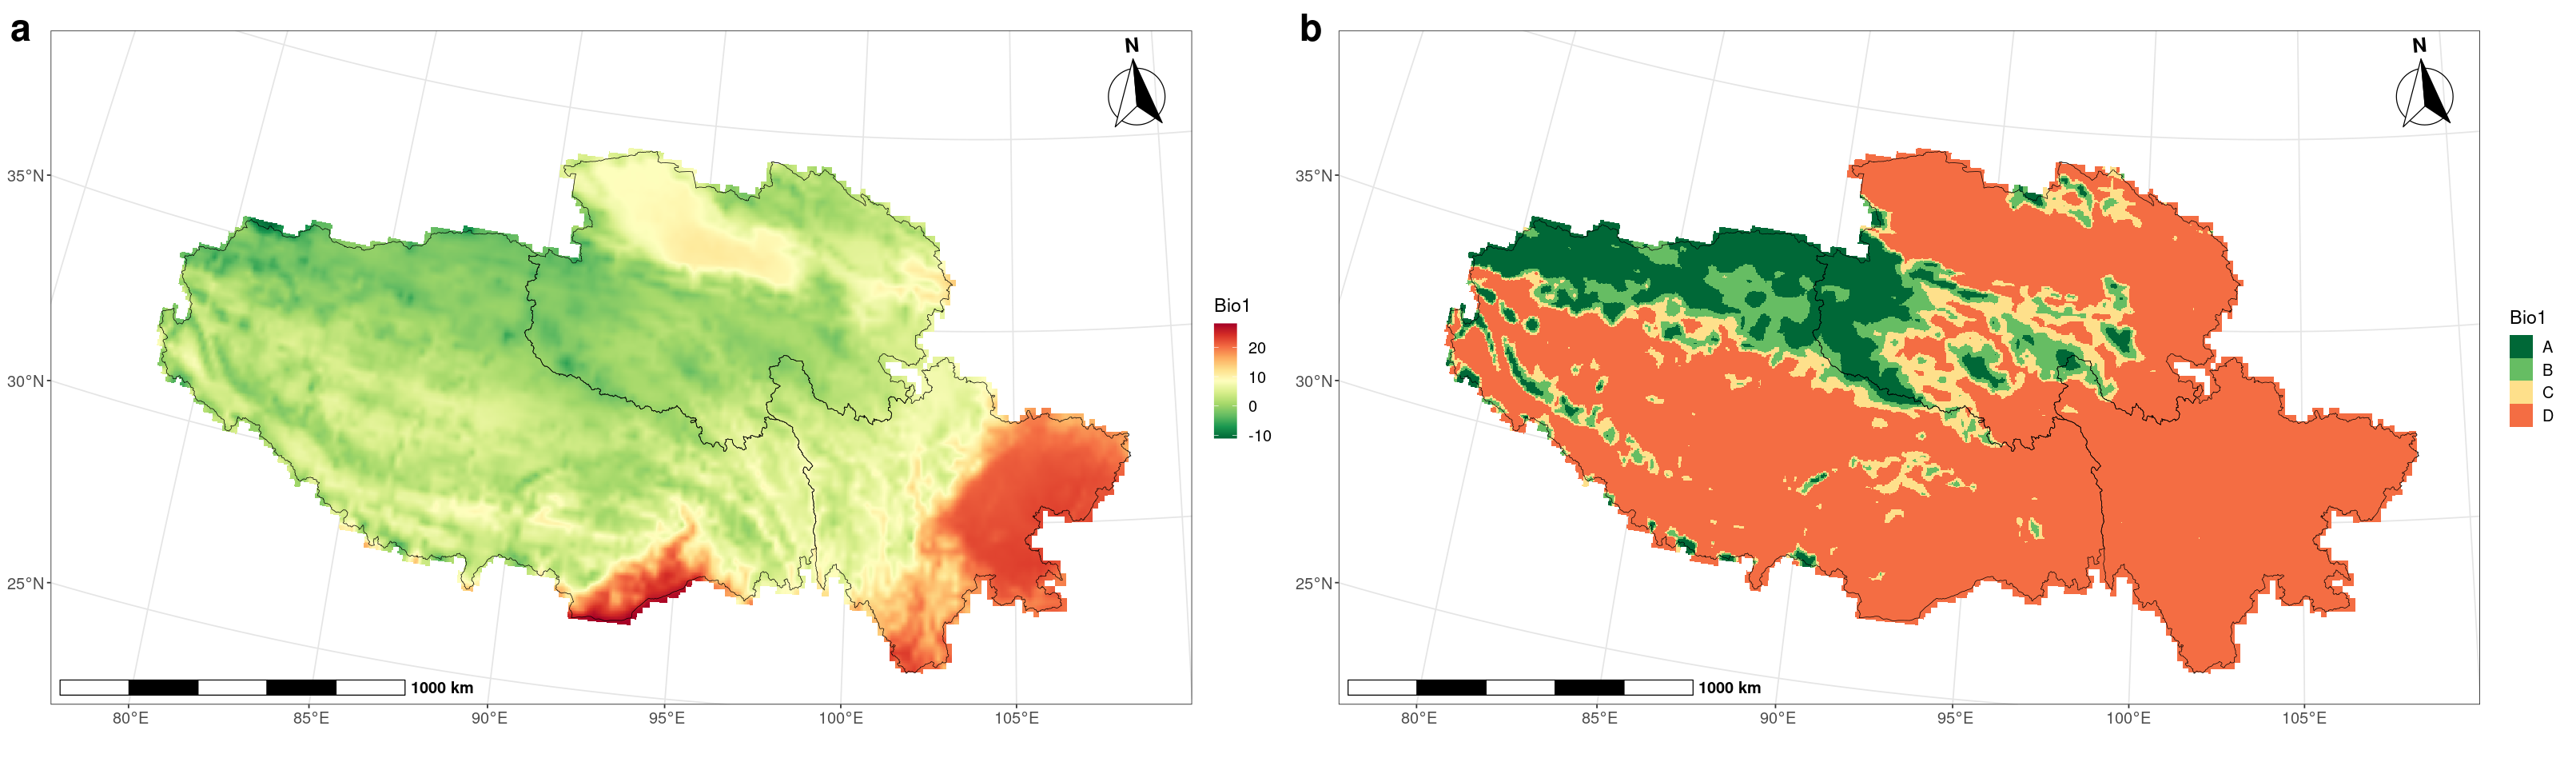

In [16]:
# Visualize the Bio1 (Mean annual temperature) of `ACCESS-CM2|ssp585|2061-2080` 
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q9 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$fut$`ACCESS-CM2|ssp585|2061-2080`$Bio1) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q10 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
   add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$fut$`ACCESS-CM2|ssp585|2061-2080`$Bio1, breaks = c(-1, 0, 1), labels = c("A", "B", "C", "D")) %>% 
   add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q9, q10, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

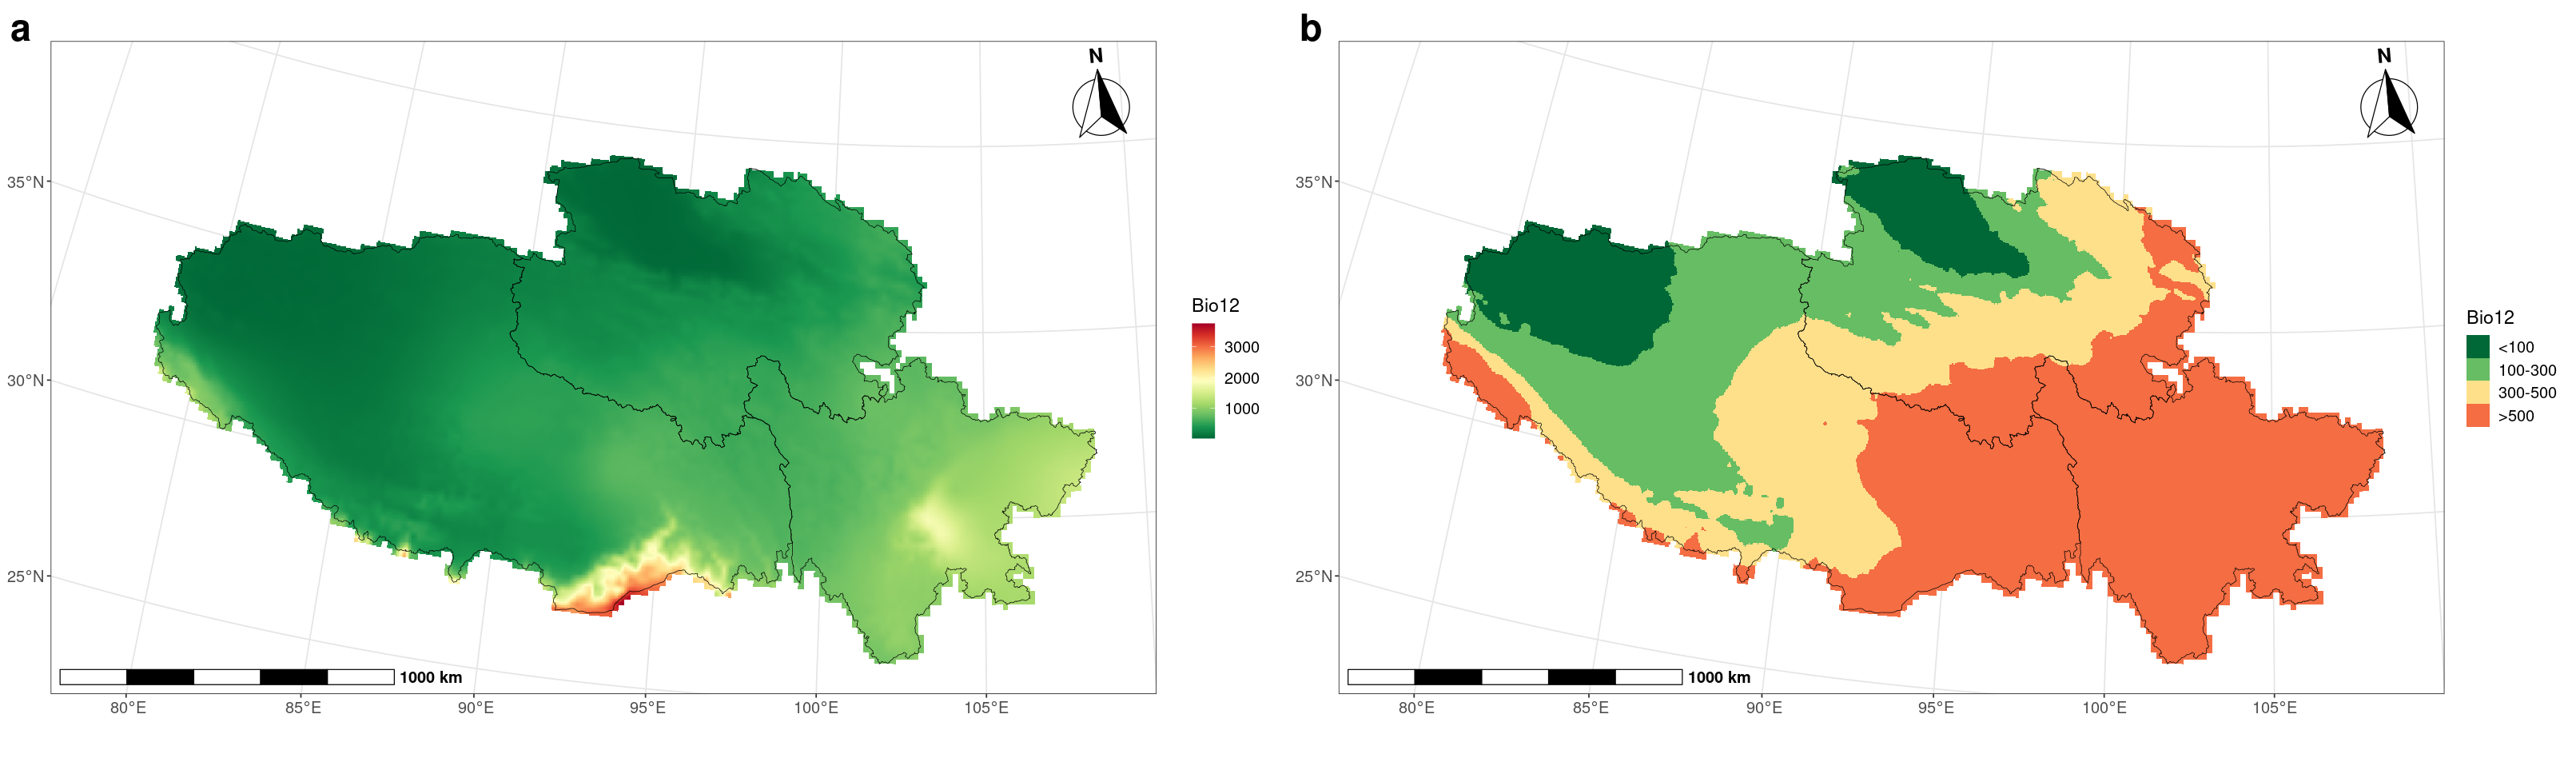

In [17]:
# Visualize the Bio12 (Mean annual precipitation) of `ACCESS-CM2|ssp585|2061-2080` 
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q11 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$fut$`ACCESS-CM2|ssp585|2061-2080`$Bio12) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q12 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
   add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$fut$`ACCESS-CM2|ssp585|2061-2080`$Bio12, breaks = c(100, 300, 500), labels = c("<100", "100-300", "300-500", ">500")) %>% 
   add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q11, q12, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 5. Collect numeric metrics from MODIS

The `get_modis_num_metrics()` is implemented to download numeric [MODIS](https://modis.gsfc.nasa.gov/) metrics from the [EOSDIS](https://cmr.earthdata.nasa.gov). Running `microgeo::show_modis_num_metrics()` can display detailed infomation about these metrics. Regarding the `NDVI` and `ENV`, you can specify a spatial resolution (meter). Here is a simple example.

In [18]:
# Show all avaliable numeric MODIS metrics
show_modis_num_metrics()

measure resolution type  name       sds               unit      
1  NDVI    250        Terra MOD13Q1    250m 16 days NDVI no unit   
2  NDVI    500        Terra MOD13A1    500m 16 days NDVI no unit   
3  NDVI    1000       Terra MOD13A2    1 km 16 days NDVI no unit   
4  NDVI    250        Aqua  MYD13Q1    250m 16 days NDVI no unit   
5  NDVI    500        Aqua  MYD13A1    500m 16 days NDVI no unit   
6  NDVI    1000       Aqua  MYD13A2    1 km 16 days NDVI no unit   
7  EVI     250        Terra MOD13Q1    250m 16 days EVI  no unit   
8  EVI     500        Terra MOD13A1    500m 16 days EVI  no unit   
9  EVI     1000       Terra MOD13A2    1 km 16 days EVI  no unit   
10 EVI     250        Aqua  MYD13Q1    250m 16 days EVI  no unit   
11 EVI     500        Aqua  MYD13A1    500m 16 days EVI  no unit   
12 EVI     1000       Aqua  MYD13A2    1 km 16 days EVI  no unit   
13 GPP     500        Terra MOD17A2HGF Gpp_500m          kg C/m^2  
14 GPP     500        Aqua  MYD17A2H   Gpp_500m          kg C/m^2  
15 PsnNet  500        Terra MOD17A2HGF PsnNet_500m       kg C/m^2  
16 PsnNet  500        Aqua  MYD17A2H   PsnNet_500m       kg C/m^2  
17 NPP     500        Terra MOD17A3HGF Npp_500m          kg C/m^2  
18 NPP     500        Aqua  MYD17A3HGF Npp_500m          kg C/m^2  
19 LST     1000       Terra MOD11A1    LST_Day_1km       Kelvin    
20 LST     1000       Aqua  MYD11A1    LST_Day_1km       Kelvin    
21 ET      500        Terra MOD16A2    ET_500m           kg/m²/8day
22 ET      500        Aqua  MYD16A2    ET_500m           kg/m²/8day
23 PET     500        Terra MOD16A2    PET_500m          kg/m²/8day
24 PET     500        Aqua  MYD16A2    PET_500m          kg/m²/8day
25 LE      500        Terra MOD16A2    LE_500m           J/m²/day  
26 LE      500        Aqua  MYD16A2    LE_500m           J/m²/day  
27 PLE     500        Terra MOD16A2    PLE_500m          J/m²/day  
28 PLE     500        Aqua  MYD16A2    PLE_500m          J/m²/day  
   scale.factor
1  1e-04       
2  1e-04       
3  1e-04       
4  1e-04       
5  1e-04       
6  1e-04       
7  1e-04       
8  1e-04       
9  1e-04       
10 1e-04       
11 1e-04       
12 1e-04       
13 1e-04       
14 1e-04       
15 1e-04       
16 1e-04       
17 1e-04       
18 1e-04       
19 0.02        
20 0.02        
21 0.1         
22 0.1         
23 0.1         
24 0.1         
25 10000       
26 10000       
27 10000       
28 10000

In [19]:
# Download numeric metrics from MODIS
# Please provide correct username and password. Run `?get_modis_num_metrics()` to see more details.
dataset.dts.aliyun %<>% get_modis_num_metrics(username = "username", password = "password", 
                                              date.ran = c("2019-08-01|2019-09-01", "2020-08-01|2020-09-01"),
                                              measures = c("NDVI", "EVI"), out.dir = "test", nums.job = 12)

ℹ [2024-01-14 11:38:40] INFO ==> preparing MODIS product list for searching...

ℹ [2024-01-14 11:38:40] INFO ==> searching avaliable MODIS products...

ℹ [2024-01-14 11:38:40] INFO ==> current product (1/2): MOD13A2 (NDVI|EVI--> 2019-08-01 to 2019-09-01)

ℹ [2024-01-14 11:38:47] INFO ==> current product (2/2): MOD13A2 (NDVI|EVI--> 2020-08-01 to 2020-09-01)

ℹ [2024-01-14 11:38:49] INFO ==> find 48 files with 0.97 GB in total...

ℹ [2024-01-14 11:38:49] INFO ==> downloading all avaliable MODIS products[skip if the file exists]...

ℹ [2024-01-14 11:38:49] INFO ==> preparing the PTVs (Product, Time, Version) for merging remote-sensing images...

ℹ [2024-01-14 11:38:49] INFO ==> converting hdf files to tif files...

ℹ [2024-01-14 11:38:49] INFO ==> current product (1/1): MOD13A2 (convert 48 hdf files into 12 tif files using 12 threads)

ℹ [2024-01-14 11:38:49] INFO ==> calculating average values based on date range...

ℹ [2024-01-14 11:38:49] INFO ==> current measure (1/2): NDVI_061(12 thr

In [20]:
# Show dataset 
dataset.dts.aliyun %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 23 historically numeric variables; 0 historically classification variables; 4 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


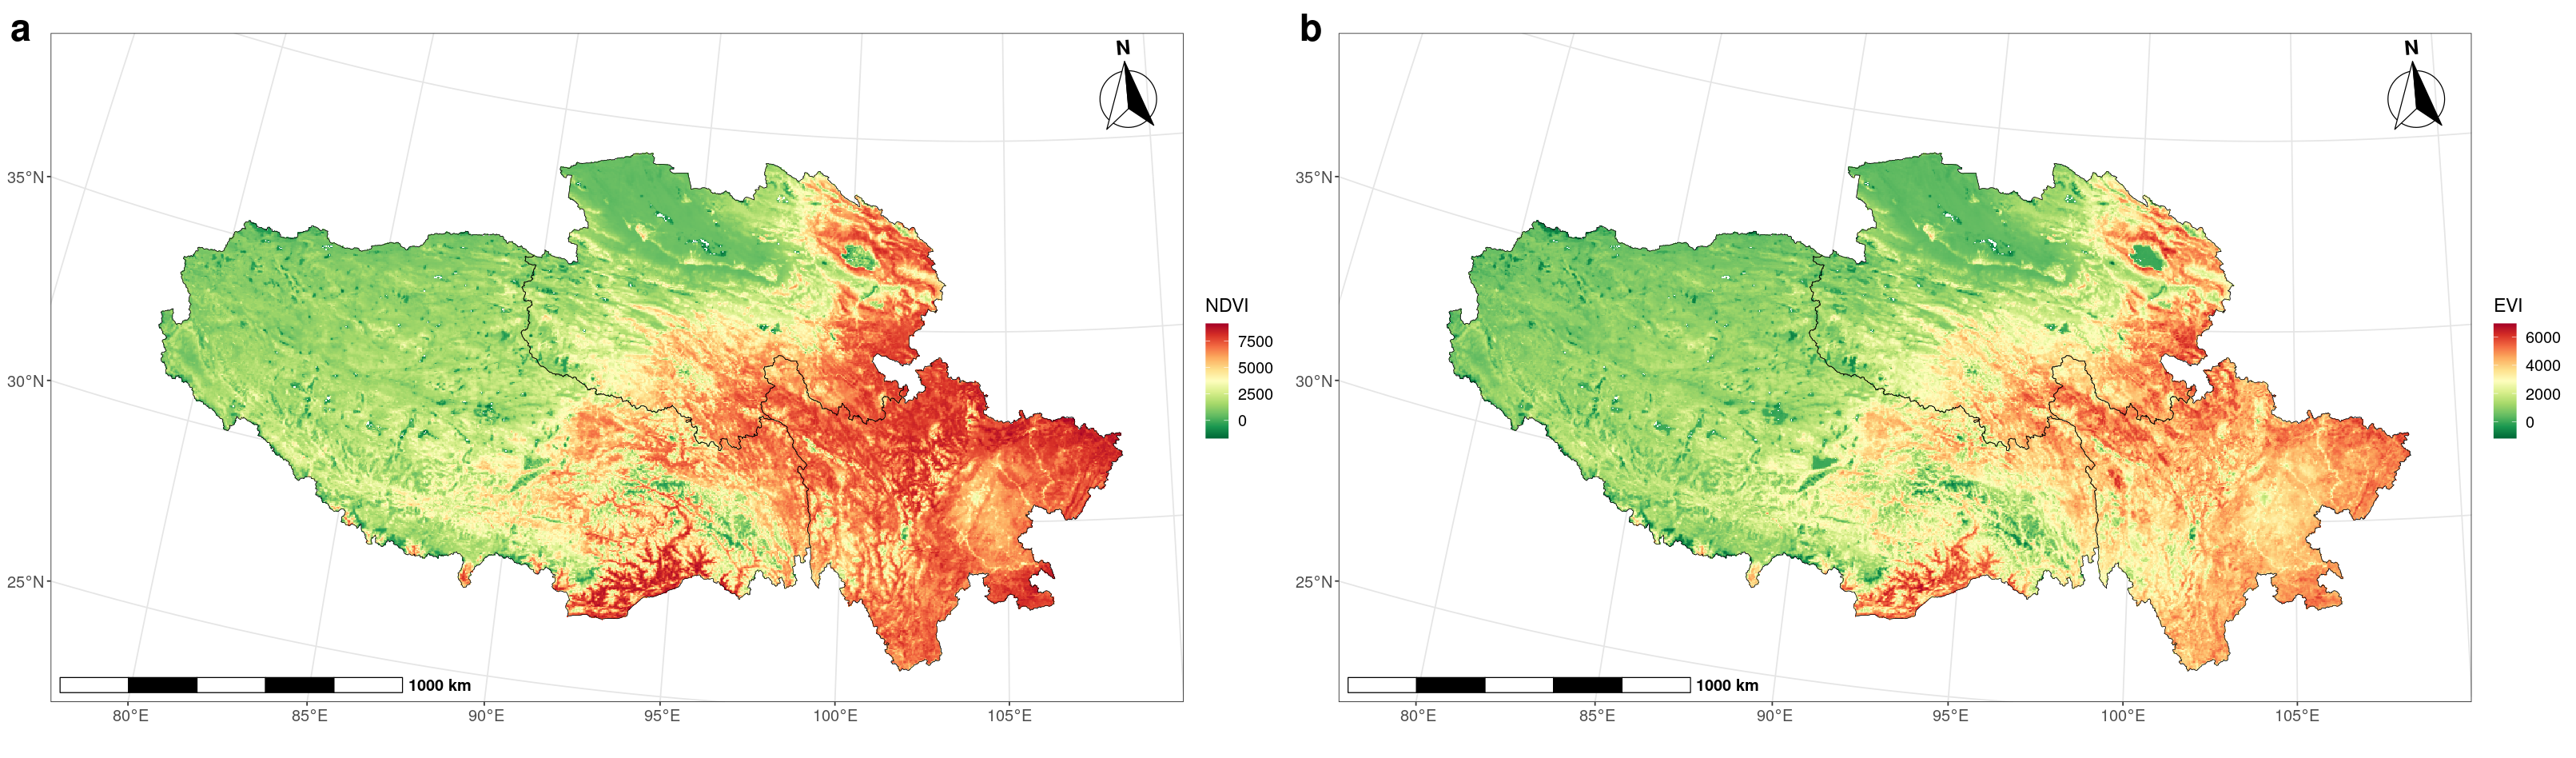

In [21]:
# Visualize the NDVI and EVI 
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q13 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$NDVI) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q14 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$EVI) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q13, q14, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 6. Collect classification metrics from MODIS

The `get_modis_cla_metrics()` is used to download classification [MODIS](https://modis.gsfc.nasa.gov/) metrics from the [EOSDIS](https://cmr.earthdata.nasa.gov). Running `microgeo::show_modis_cla_metrics()` can display detailed infomation about these metrics. Here is a simple example.

In [22]:
# Show all avaliable classification metrics
show_modis_cla_metrics()

measure             resolution type     name    sds                 unit   
1  LC_Type1            Moderate   Combined MCD12Q1 LC_Type1            no unit
2  LC_Type2            Moderate   Combined MCD12Q1 LC_Type2            no unit
3  LC_Type3            Moderate   Combined MCD12Q1 LC_Type3            no unit
4  LC_Type4            Moderate   Combined MCD12Q1 LC_Type4            no unit
5  LC_Type5            Moderate   Combined MCD12Q1 LC_Type5            no unit
6  LC_Prop1            Moderate   Combined MCD12Q1 LC_Prop1            no unit
7  LC_Prop2            Moderate   Combined MCD12Q1 LC_Prop2            no unit
8  LC_Prop3            Moderate   Combined MCD12Q1 LC_Prop3            no unit
9  LC_Prop1_Assessment Moderate   Combined MCD12Q1 LC_Prop1_Assessment no unit
10 LC_Prop2_Assessment Moderate   Combined MCD12Q1 LC_Prop2_Assessment no unit
11 LC_Prop3_Assessment Moderate   Combined MCD12Q1 LC_Prop3_Assessment no unit
   scale.factor
1  NA          
2  NA          
3  NA          
4  NA          
5  NA          
6  NA          
7  NA          
8  NA          
9  NA          
10 NA          
11 NA

In [23]:
# Download classification metrics from MODIS
# Please provide correct username and password. Run `?get_modis_num_metrics()` to see more details.
dataset.dts.aliyun %<>% get_modis_cla_metrics(username = "username", password = "password", 
                                              measures = "LC_Type1", out.dir = "test") 

ℹ [2024-01-14 11:39:22] INFO ==> preparing MODIS product list for searching...

ℹ [2024-01-14 11:39:22] INFO ==> searching avaliable MODIS products...

ℹ [2024-01-14 11:39:22] INFO ==> current product (1/1): MCD12Q1 (LC_Type1--> 2022-01-01 to 2022-12-31)

ℹ [2024-01-14 11:39:23] INFO ==> find 8 files with 0.09 GB in total...

ℹ [2024-01-14 11:39:23] INFO ==> downloading all avaliable MODIS products[skip if the file exists]...

ℹ [2024-01-14 11:39:23] INFO ==> preparing the PTVs (Product, Time, Version) for merging remote-sensing images...

ℹ [2024-01-14 11:39:23] INFO ==> converting hdf files to tif files...

ℹ [2024-01-14 11:39:23] INFO ==> current product (1/1): MCD12Q1 (convert 8 hdf files into 1 tif files using 1 threads)

ℹ [2024-01-14 11:39:23] INFO ==> collecting all merged image files...

ℹ [2024-01-14 11:39:24] INFO ==> current measure (1/1): LC_Type1_061

ℹ [2024-01-14 11:39:24] INFO ==> reprojecting the CRS of SpatRaster to epsg:+proj=longlat +datum=WGS84 +no_defs, it takes 

In [24]:
# Show dataset 
dataset.dts.aliyun %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 23 historically numeric variables; 1 historically classification variables; 4 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


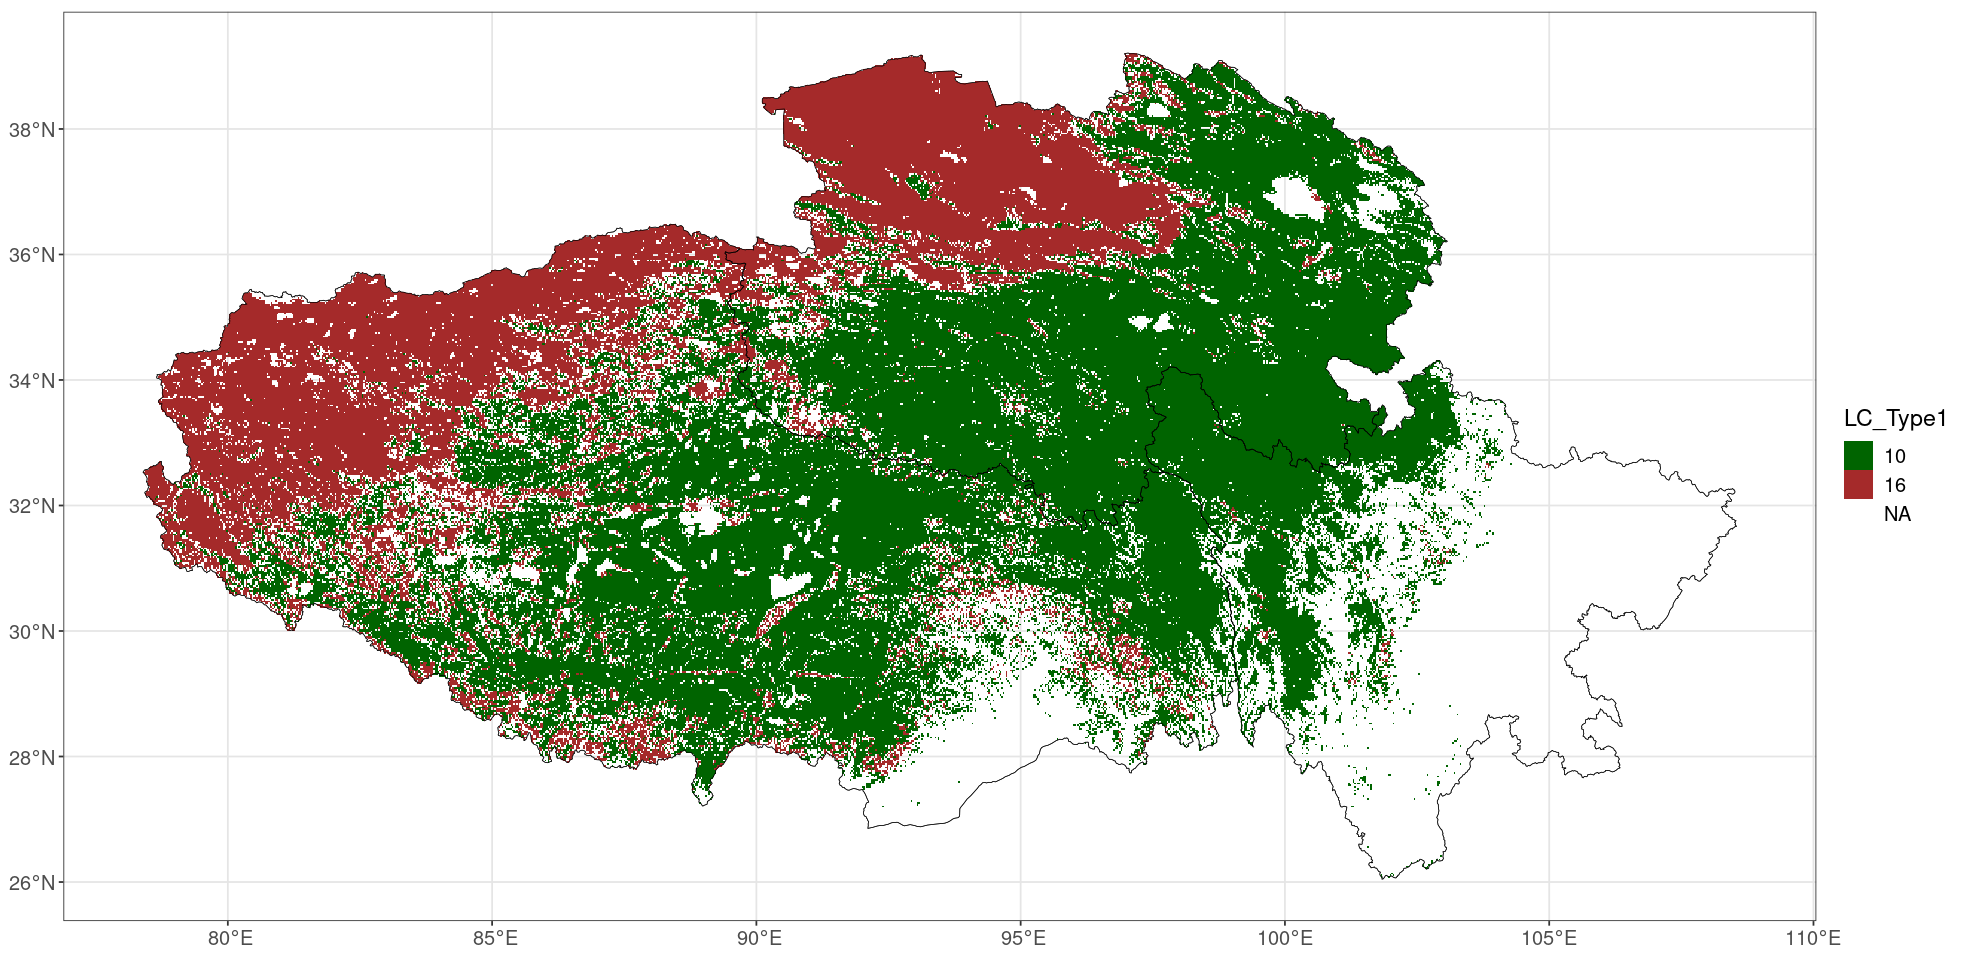

In [25]:
# Subset classification. Due to the high data resolution, it is not recommended to use `add_crs()` for visualization here. Otherwise, it may take a very long time.
options(repr.plot.width = 16.4, repr.plot.height = 8.02)
g.spat.raster <- subset_cla_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$cla$LC_Type1, use.class = c(10, 16)) # Only display grassland and barren
plot_bmap(map = dataset.dts.aliyun$map) %>% add_spatraster(spat.raster = g.spat.raster, color = c("darkgreen", "brown"))

## 7. Collect world soil properties

The `get_soilgrid()` is implemented to download soil metrics from [SoilGRIDS]('https://www.isric.org/explore/soilgrids'). In the current version, there are 8 avaliable metrics. Here is a simple example.

In [26]:
# Download soil metrics from the SoilGRIDS for the research region
dataset.dts.aliyun %<>% get_soilgrid(depth = 5, measures = c("phh2o", "soc"), out.dir = "test") 

✔ [2024-01-14 11:40:07] SAVE ==> results have been saved to: object$spa$rast$his$phh2o

✔ [2024-01-14 11:40:15] SAVE ==> results have been saved to: object$spa$rast$his$soc



In [27]:
# Show dataset 
dataset.dts.aliyun %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 25 historically numeric variables; 1 historically classification variables; 4 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


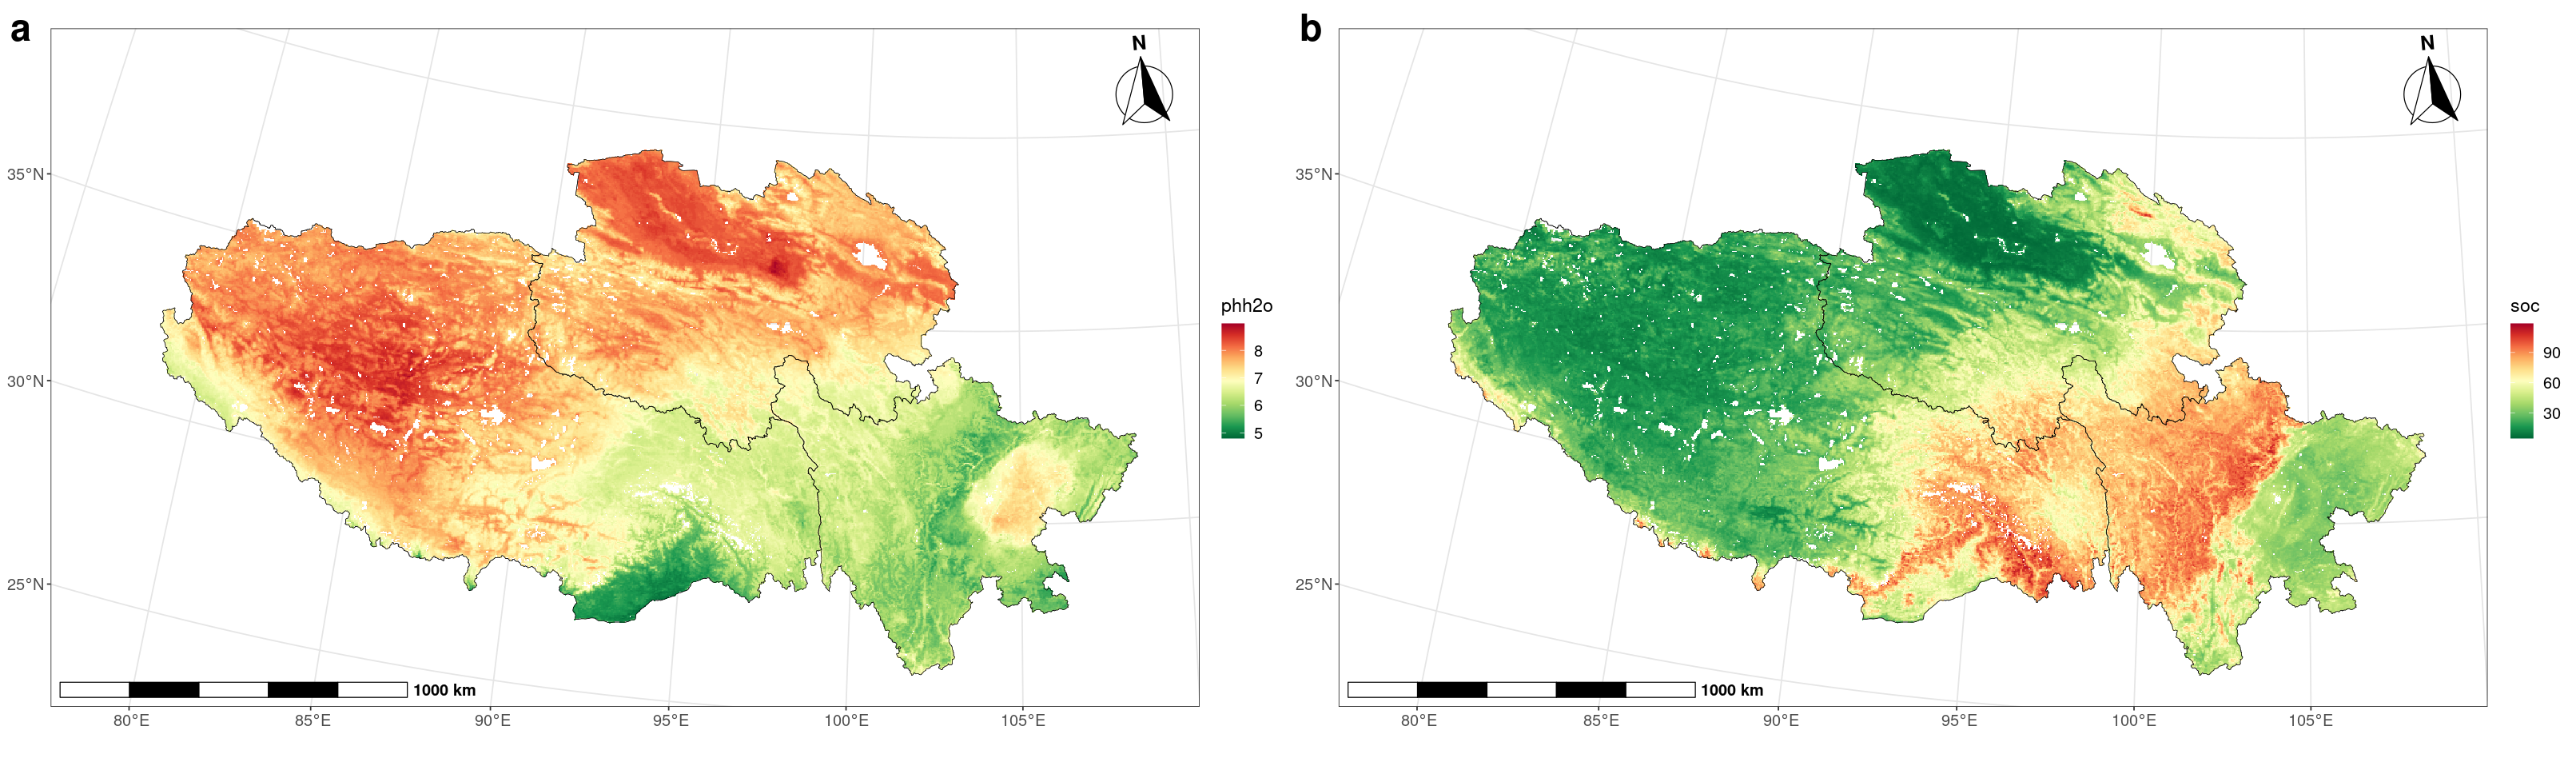

In [28]:
# Visualize the phh2o and soc
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q15 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$phh2o) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q16 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$soc) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q15, q16, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 8. Collect China soil properties

The `get_soilcn()` function is used to process soil metrics downloaded from [here](http://globalchange.bnu.edu.cn/research/soil2). Due to the limitations in copyrights, the spatial data of China soil properties should be manually downloaded. Here is a simple example.

In [29]:
# Process soil metrics of CHINA for a research area
# You should download the .nc files, and then place theme into `test/soilchina_products` before run `get_soilcn()`
dataset.dts.aliyun %<>% get_soilcn(depth = 0.045, measures = c("PH", "SOM"), out.dir = "test") 

✔ [2024-01-14 11:40:27] SAVE ==> results have been saved to: object$spa$rast$his$PH

✔ [2024-01-14 11:40:34] SAVE ==> results have been saved to: object$spa$rast$his$SOM



In [30]:
# Show dataset 
dataset.dts.aliyun %>% show_dataset()

── The Summary of Microgeo Dataset ─────────────────────────────────────────────


! object$mat: 6808 ASVs/genes and 1244 samples [need to be subsampled!]

ℹ object$ant: 6808 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1244 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6808 tip labels

ℹ object$env: 1244 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 27 historically numeric variables; 1 historically classification variables; 4 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`


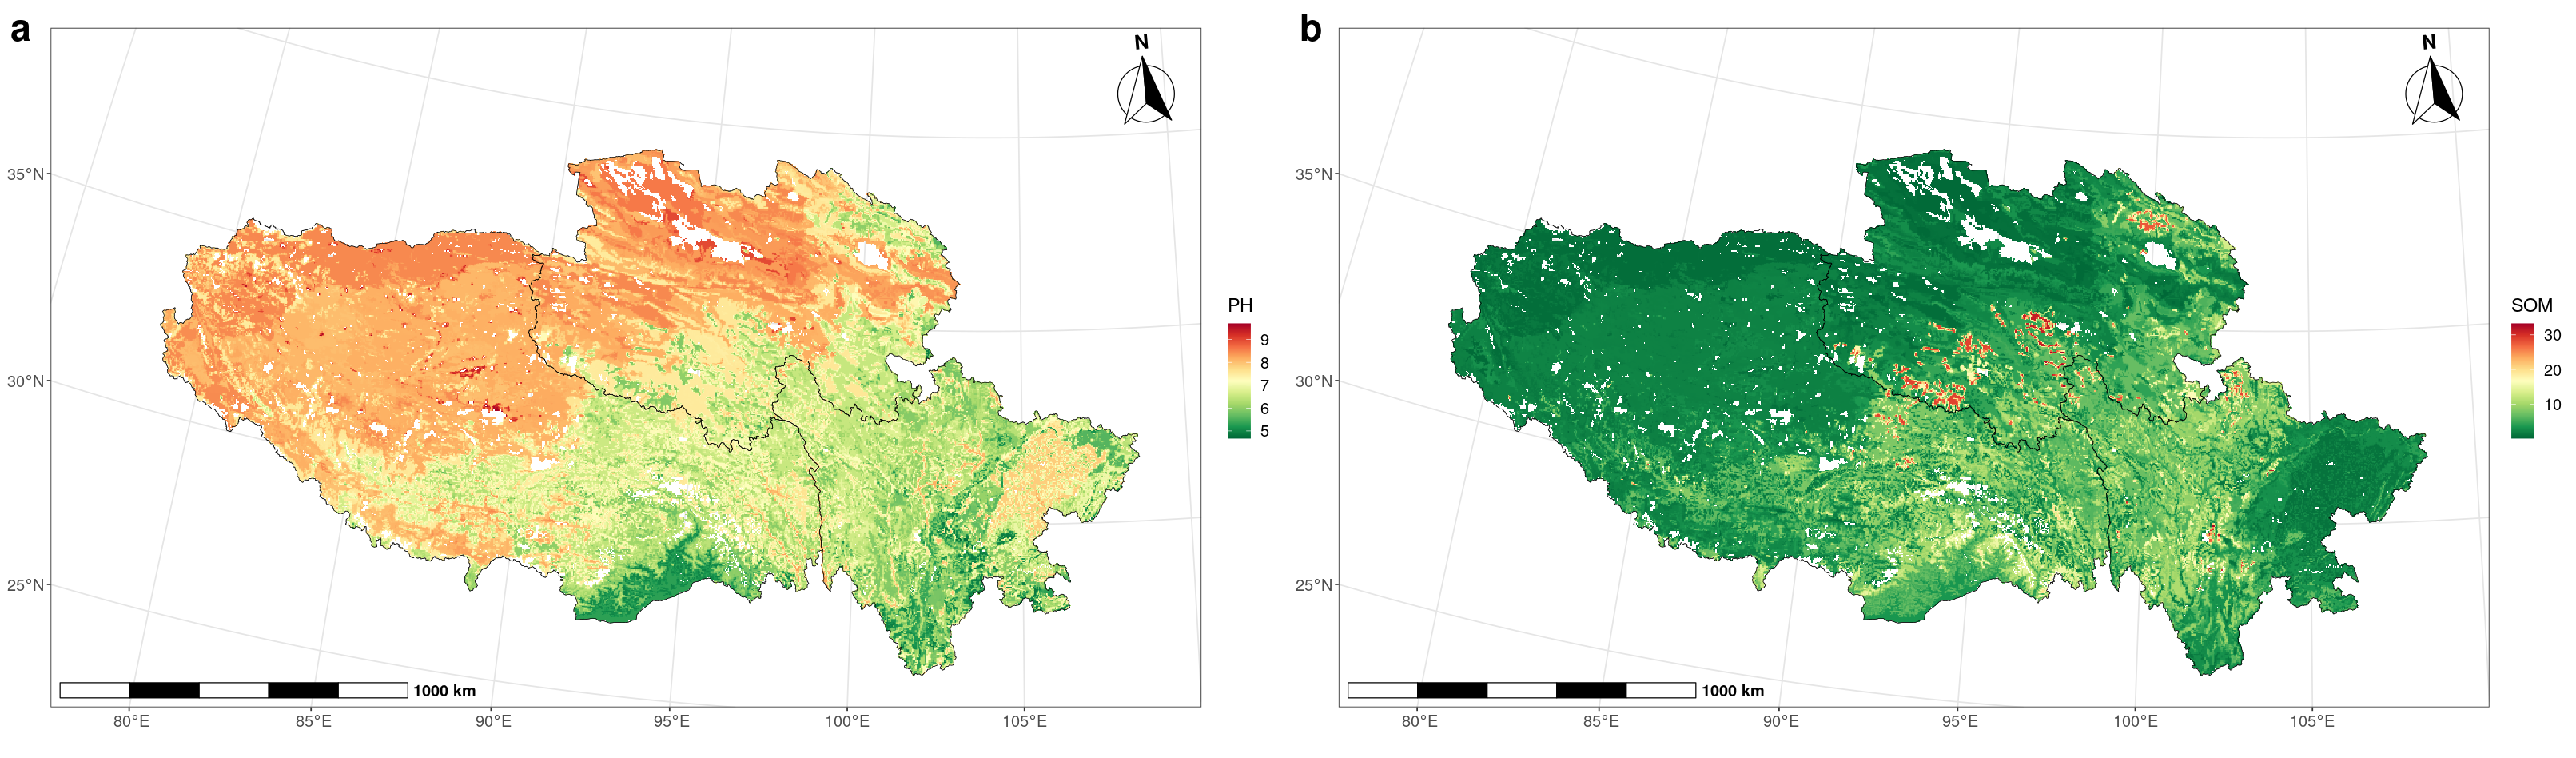

In [31]:
# Visualize the PH and SOM 
options(repr.plot.width = 13.43 * 2, repr.plot.height = 7.9)
q17 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$PH) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
q18 <- plot_bmap(map = dataset.dts.aliyun$map) %>%
    add_spatraster(spat.raster = dataset.dts.aliyun$spa$rast$his$SOM) %>% 
    add_north_arrow() %>% add_scale_bar() %>% add_crs()
cowplot::plot_grid(q17, q18, align = 'hv', ncol = 2, labels = c("a", "b"), label_size = 28) %>% suppressWarnings()

## 9. Extract spatial data for each sample

After all spatial data have been successfully downloaded, we can use the `extract_data_from_spatraster()` function to extract these spatial data based on the latitude and longitude of the samples. Here is a simple example.

In [32]:
# Show spatial variable names in the dataset before the extraction 
dataset.dts.aliyun %<>% get_spa_vars()
head(dataset.dts.aliyun$spa$unit)

measure unit             
1 ELEV    m                
2 AI                       
3 Bio1    degree centigrade
4 Bio2    degree centigrade
5 Bio3    degree centigrade
6 Bio4    degree centigrade

In [33]:
# Extract spatial data for samples
dataset.dts.aliyun %<>% extract_data_from_spatraster() %>% suppressWarnings() # A data.frame of historically spatial variables for each sample is avaliable at `dataset.dts.aliyun$spa$tabs`
head(dataset.dts.aliyun$spa$tabs)

! [2024-01-14 11:40:41] WARN ==> Some samples were failed to be applied for extraction. use `remove.na = FALSE` to check them!

✔ [2024-01-14 11:40:41] SAVE ==> results have been saved to: object$spa$tabs



LC_Type1 AI     ELEV     Bio1      Bio2     Bio3     Bio4     Bio5    
s1 10       0.4758 4267.391 -1.068052 14.70242 40.65077 779.0138 14.79816
s2 10       0.4758 4267.391 -1.068052 14.70242 40.65077 779.0138 14.79816
s3 10       0.4758 4267.391 -1.068052 14.70242 40.65077 779.0138 14.79816
s4 10       0.4758 4267.391 -1.068052 14.70242 40.65077 779.0138 14.79816
s5 10       0.4758 4267.391 -1.068052 14.70242 40.65077 779.0138 14.79816
s6 10       0.4872 4269.422 -1.077553 14.71107 40.66435 779.0543 14.78921
   Bio6      Bio7     ⋯ Bio16    Bio17 Bio18    Bio19 NDVI     EVI     
s1 -21.37076 36.16893 ⋯ 308.0594 14    308.0594 16    7096.169 5045.434
s2 -21.37076 36.16893 ⋯ 308.0594 14    308.0594 16    7096.169 5045.434
s3 -21.37076 36.16893 ⋯ 308.0594 14    308.0594 16    7096.169 5045.434
s4 -21.37076 36.16893 ⋯ 308.0594 14    308.0594 16    7096.169 5045.434
s5 -21.37076 36.16893 ⋯ 308.0594 14    308.0594 16    7096.169 5045.434
s6 -21.38880 36.17801 ⋯ 308.1281 14    308.1281 16    7303.110 5289.111
   phh2o    soc      PH    SOM  
s1 7.000000 58.19997 7.781 7.354
s2 7.000000 58.19997 7.781 7.354
s3 7.000000 58.19997 7.781 7.354
s4 7.000000 58.19997 7.781 7.354
s5 7.000000 58.19997 7.781 7.354
s6 6.900001 63.49995 7.781 7.354

In [34]:
# Check sample numbers 
dim(dataset.dts.aliyun$spa$tabs)

[1] 1095   28

In [35]:
# Finally, we tidy up the dataset again 
dataset.dts.aliyun %<>% rarefy_count_table()
dataset.dts.aliyun %<>% tidy_dataset()
dataset.dts.aliyun %>% show_dataset()

ℹ [2024-01-14 11:40:43] INFO ==> the ASV/gene abundance table has been rarefied with a sub-sample depth of 5310



── The Summary of Microgeo Dataset ─────────────────────────────────────────────


ℹ object$mat: 6806 ASVs/genes and 1095 samples [subsample depth: 5310]

ℹ object$ant: 6806 ASVs/genes and 7 annotation levels (Kingdom, Phylum, Class, Order, Family, Genus, Species)

ℹ object$met: 1095 samples and 2 variables (longitude, latitude)

ℹ object$map: a SpatialPolygonsDataFrame with the CRS of '+proj=longlat +datum=WGS84 +no_defs'

ℹ object$phy: a phylogenetic tree with 6806 tip labels

ℹ object$env: 1095 samples and 10 variables




── The Summary of Biogeographic Traits ─────────────────────────────────────────


✔ object$spa: 27 historically numeric variables; 1 historically classification variables; 4 groups of future climate data




• To check the summary of dataset, Replace `object` with the variable name of your dataset
• For example, if the variable name is `dataset.dts`you can run `head(dataset.dts$met)` to check the content of `met`
